In [114]:

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline

# Load the dataset
df = pd.read_csv('TEST.csv')

In [115]:
df

,windspeed,rainfall24,rainfall6,rainfallaverage,area,yield,distance,areayieldrataio,percentageofarea,darea,yielda,fgprice,dctrice
0,0.000000,1.535972,3.032222,0.959983,2870.00,3.37,0.00000,851.632047,0.247070,709.091324,0.832626,20.79,1.113550e+07
1,0.000000,2.141071,3.942857,1.338170,491.00,4.36,0.00000,112.614679,0.244428,120.014173,1.065706,20.79,2.412279e+06
2,7.116629,5.809375,20.589580,3.630859,1330.88,4.42,385.79860,301.104072,0.312983,416.543187,1.383386,20.79,1.086828e+07
3,67.089467,3.908854,11.341670,2.443034,5767.00,4.65,26.26015,1240.215054,0.567852,3274.800267,2.640510,20.79,1.630911e+08
4,0.000000,0.805469,1.580208,0.503418,4710.00,4.14,0.00000,1137.681159,0.130472,614.521934,0.540153,20.79,6.260539e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [116]:
# Split the dataset into features and target variable
X = df.drop(['dctrice','percentageofarea','yielda','darea','areayieldrataio','rainfallaverage'], axis=1)
y = df.drop(['darea','percentageofarea','yielda','windspeed','rainfall24','rainfall6','rainfallaverage','areayieldrataio','area', 'yield', 'fgprice','distance'], axis=1)

In [117]:
X

,windspeed,rainfall24,rainfall6,area,yield,distance,fgprice
0,0.000000,1.535972,3.032222,2870.00,3.37,0.00000,20.79
1,0.000000,2.141071,3.942857,491.00,4.36,0.00000,20.79
2,7.116629,5.809375,20.589580,1330.88,4.42,385.79860,20.79
3,67.089467,3.908854,11.341670,5767.00,4.65,26.26015,20.79
4,0.000000,0.805469,1.580208,4710.00,4.14,0.00000,20.79
...,...,...,...,...,...,...,...
42037,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42038,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42039,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42040,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
X.shape, y.shape

((42042, 7), (42042, 1))

In [119]:
# First split the data into a training set and a temporary set using an 80-20 split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Then split the temporary set into a validation set and a test set using a 50-50 split
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [120]:

X_train.shape, y_train.shape

((33633, 7), (33633, 1))

In [121]:
y_train.info()
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33633 entries, 12421 to 15795
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dctrice  31048 non-null  float64
dtypes: float64(1)
memory usage: 525.5 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 33633 entries, 12421 to 15795
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   windspeed   31048 non-null  float64
 1   rainfall24  31048 non-null  float64
 2   rainfall6   31047 non-null  float64
 3   area        31048 non-null  float64
 4   yield       31048 non-null  float64
 5   distance    31048 non-null  float64
 6   fgprice     31048 non-null  float64
dtypes: float64(7)
memory usage: 2.1 MB


In [122]:
X_test = pd.DataFrame(X_test).apply(pd.to_numeric, errors='coerce')
X_train = pd.DataFrame(X_train).apply(pd.to_numeric, errors='coerce')
y_train = pd.DataFrame(y_train).apply(pd.to_numeric, errors='coerce')
y_test = pd.DataFrame(y_test).apply(pd.to_numeric, errors='coerce')

In [123]:
X_train.shape, y_train.shape


((33633, 7), (33633, 1))

In [124]:
# Remove the rows with zero values from the training set and testing set
mask = X_train['windspeed'] != 0

# Apply the mask to X_train
X_train = X_train[mask]

# Apply the mask to y_train
y_train = y_train[mask]

In [125]:
# Remove the rows with zero values from the training set and testing set
mask =y_train['dctrice'] != 0

# Apply the mask to X_train
X_train = X_train[mask]

# Apply the mask to y_train
y_train = y_train[mask]

In [126]:
X_train.shape, y_train.shape

((14597, 7), (14597, 1))

In [127]:
nan_rows = X_train[X_train.isna().any(axis=1)].index
X_train = X_train.drop(nan_rows)
y_train = y_train.drop(nan_rows)

print(np.where(pd.isnull(X_train)))

(array([], dtype=int64), array([], dtype=int64))


In [128]:
X_train.shape,y_train.shape

((12012, 7), (12012, 1))

In [129]:
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_val_scaled = scaler.transform(X_val)

In [130]:
# #Convert X_test to DataFrame

# X_test_df = pd.DataFrame(X_val_scaled)

# nan_rows = X_test_df[X_test_df.isna().any(axis=1)].index
# X_test_scaled_final = X_test_df.drop(nan_rows)

# print(np.where(pd.isnull(X_test_scaled_final)))


In [131]:
nan_rows = X_test[X_test.isna().any(axis=1)].index
X_test = X_test.drop(nan_rows)
y_test = y_test.drop(nan_rows)

In [132]:
nan_rows = X_val[X_val.isna().any(axis=1)].index
X_val = X_val.drop(nan_rows)
y_val = y_val.drop(nan_rows)

In [133]:
X_val.shape, y_val.shape

((3844, 7), (3844, 1))

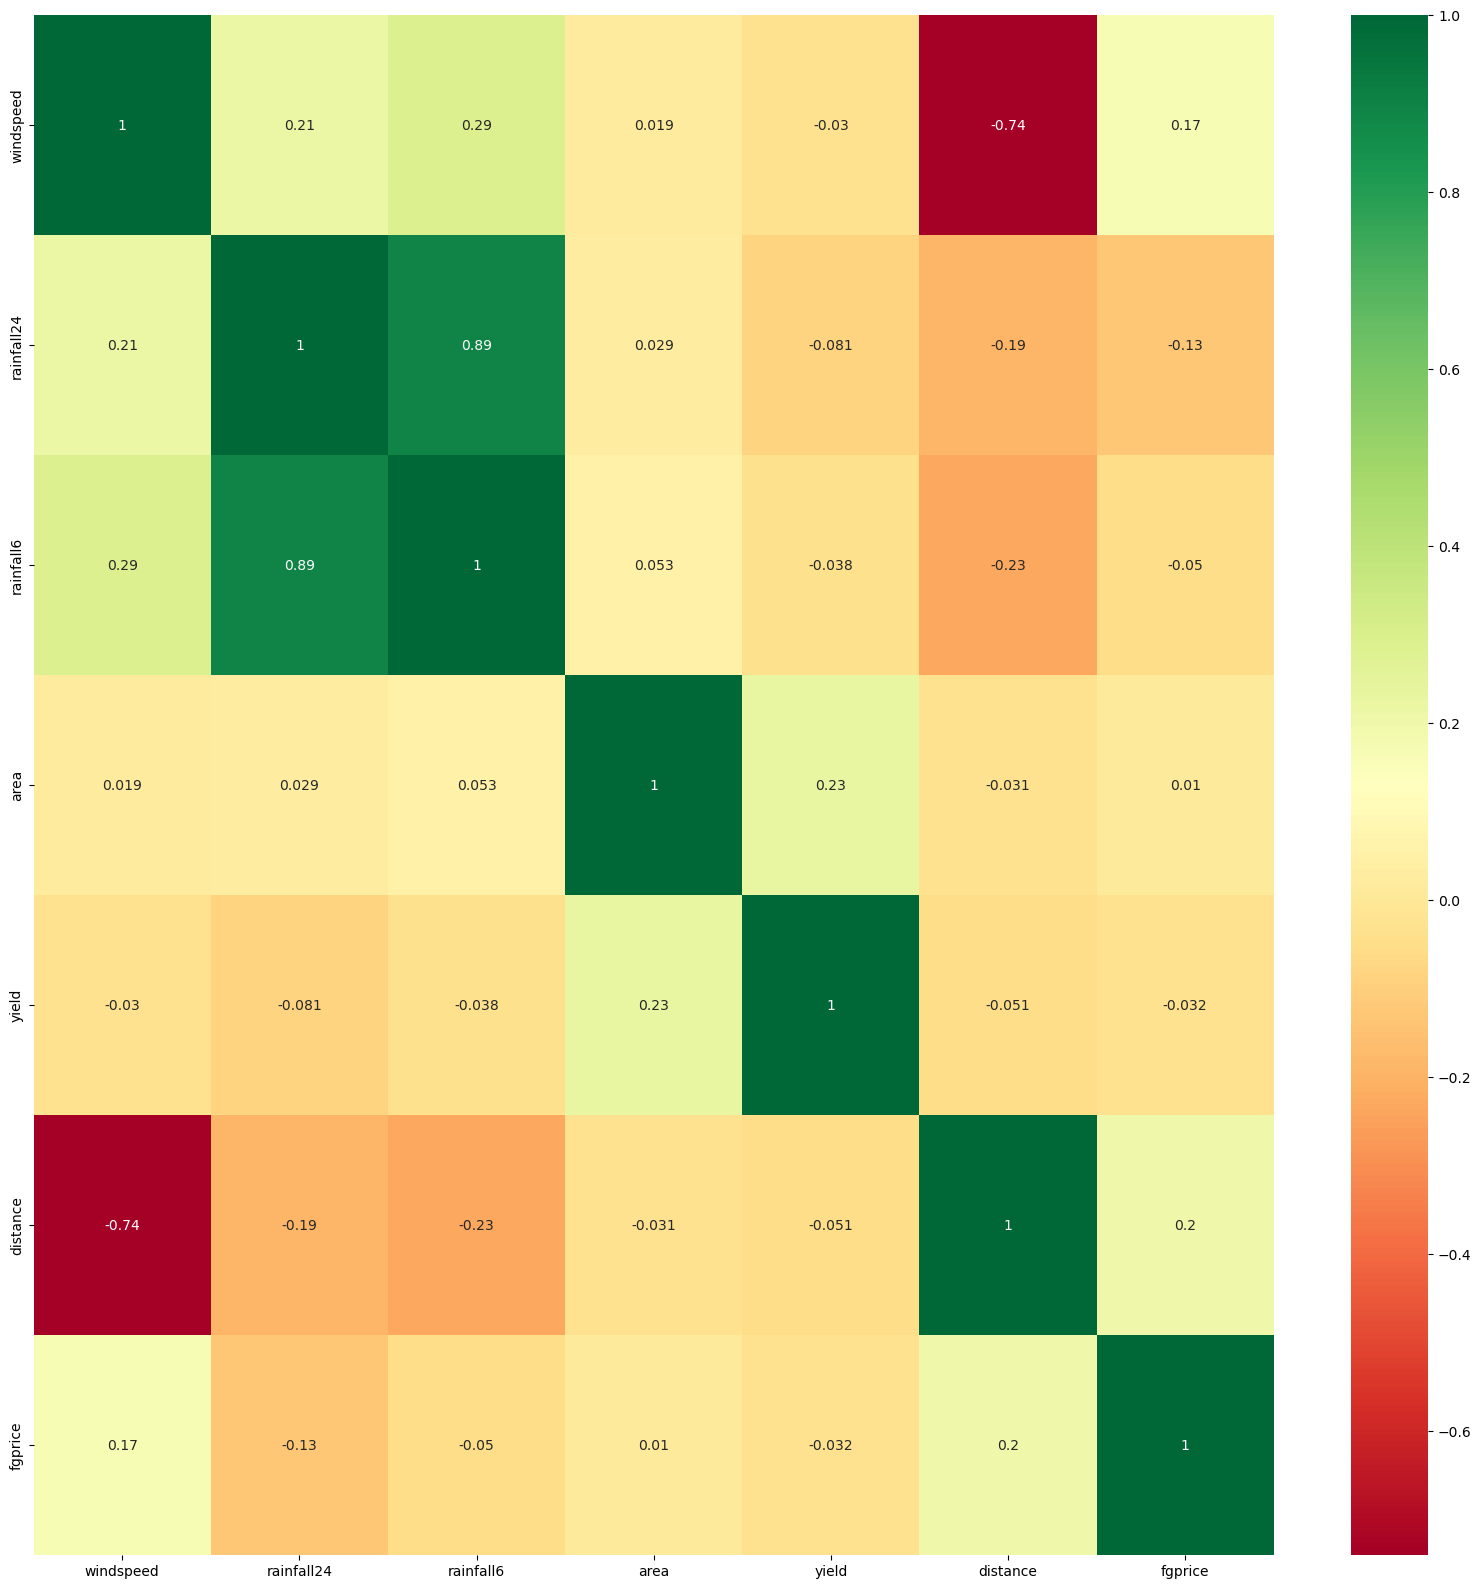

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt


corrmat = X_train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

# Plot heat map
g=sns.heatmap(X_train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [135]:
X_train

,windspeed,rainfall24,rainfall6,area,yield,distance,fgprice
32259,5.104722,0.116071,0.307143,1001.0,4.22,421.1139,19.00
13295,7.211660,1.220602,3.515741,6664.0,3.01,158.7650,14.32
38496,11.595248,3.768229,5.443750,13.0,4.10,150.8120,14.32
7119,22.421727,1.502083,2.275000,2741.0,3.72,235.3558,19.00
18899,9.203878,2.111979,2.862500,2040.0,2.62,336.6848,14.32
...,...,...,...,...,...,...,...
16023,3.000949,0.853191,0.853191,17.0,5.58,408.8042,14.32
37194,12.847797,1.230729,2.916667,5614.0,4.50,247.3428,14.32
16850,1.709343,1.346094,2.183333,3561.0,4.17,415.5511,14.32
11284,14.460432,1.635185,3.412963,6760.0,3.20,155.7449,19.00


In [136]:
X_val

,windspeed,rainfall24,rainfall6,area,yield,distance,fgprice
33620,0.000000,0.757292,1.143750,39.0,2.21,0.000000,14.32
15553,0.000000,2.323148,2.323148,0.0,0.00,423.912100,14.32
11081,2.781381,0.006250,0.025000,41.0,5.02,470.667200,19.00
3622,0.000000,0.030655,0.046429,0.0,0.00,0.000000,20.79
23356,44.105604,0.294149,1.127083,324.0,4.17,1.770913,20.79
...,...,...,...,...,...,...,...
6515,0.000000,0.220417,0.831667,783.0,4.21,0.000000,19.00
13993,4.968334,0.798958,1.593750,4354.0,4.47,452.030900,14.32
14359,9.841233,0.815104,2.277083,0.0,0.00,281.559900,14.32
29694,0.000000,0.185000,0.596667,1134.0,2.13,0.000000,19.00


In [137]:
# Remove the rows with zero values from the training set and testing set
mask = X_val['windspeed'] != 0

# Apply the mask to X_train
X_val = X_val[mask]

# Apply the mask to y_train
y_val = y_val[mask]

In [138]:


# Create a pipeline with StandardScaler and SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler, QuantileTransformer, RobustScaler, PowerTransformer, MaxAbsScaler


pipeline = make_pipeline(RobustScaler(), SVR(kernel='poly', C=10, degree=7, gamma='scale', coef0=4.5))

# Fit the pipeline on the original, unscaled data
pipeline.fit(X_train, y_train)

# model = SVR(kernel='poly', C=0.0313, degree=2, gamma=0.0281, coef0=0.0)
# model.fit(X_train, y_train)


# model = SVR(kernel='poly', C=0.5, gamma=2.7, verbose=True)
# model.fit(X_train_scaled, y_train)

# # Make predictions on the test set
predictionsVal = pipeline.predict(X_val)

# Evaluate the model

maeV = mean_absolute_error(y_val, predictionsVal)
print(f'Mean Absolute Error (Validation): {maeV}')

r2 = pipeline.score(X_val, y_val)
print(f'R-squared (Validation): {r2}')


predictions = pipeline.predict(X_test)

# Evaluate the model

mae = mean_absolute_error(y_test, predictions)
print(f'\nMean Absolute Error (Test): {mae}')

# mae_percentage_test = (mae / y_test.values.mean()) * 100
# print(f'Mean Absolute Error (Test, p.p.): {mae_percentage_test}%')



r2 = pipeline.score(X_test, y_test)
print(f'R-squared (Test): {r2}')


c:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error (Validation): 6862212.576284025
R-squared (Validation): 0.7391654689481857

Mean Absolute Error (Test): 6049728.597089189
R-squared (Test): 0.7101561655881756


In [139]:
print(['{:.2f}'.format(pred) for pred in predictionsVal])

['783483.50', '3395716.06', '685798.97', '1295848.86', '6445277.47', '1753427.75', '2681984.82', '2147826.00', '8817840.44', '3551228.52', '2394045.98', '461291.29', '1678153.65', '1151820.63', '3022365.09', '27207067.52', '40382016.73', '-253358.25', '7481263.27', '9213675.44', '2938596.01', '2441507.64', '112096.67', '1529064.56', '1488788.03', '4895578.41', '3194681.93', '11903006.68', '3221470.04', '520274.67', '2470771.54', '7699054.83', '1755359.85', '5800009.12', '787540.13', '2440447.36', '3875039.12', '808098.12', '43702239.50', '6399838.61', '8442628.06', '13027928.81', '13139715.55', '22756526.31', '-2643.85', '59016589.37', '1418959.38', '13620397.21', '3525313.01', '4329934.05', '544035.10', '128220.44', '1031642.64', '-5236.38', '1695797.56', '1573245.06', '92867916.54', '1003898.57', '9140204.55', '2219887.83', '561310.22', '-5020.19', '732016.54', '3216450.43', '4713638.65', '2727507.47', '12239851.37', '2902526.80', '5518710.69', '18938152.79', '598477.25', '401869.15'

In [140]:

from joblib import dump

dump(pipeline, 'SVR.joblib')


['SVR.joblib']